In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read pca data
data = pd.read_csv('../processed_data/pca_coordinates.csv')

In [3]:
data

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,data.sample_id
0,1,-6.452154,-1.013894,-1.237137,-0.624631,-0.076613,-0.548685,0.324941,-0.047986,0.243990,...,-0.000535,-0.000362,-0.008059,0.005861,0.001943,-0.004758,0.001069,-5.073636e-05,-2.261212e-15,APO-posterior-3_0
1,2,-3.205586,3.239658,-3.128823,-0.062567,-0.235348,0.517507,-0.203304,-0.018595,-0.320654,...,-0.002043,-0.000601,-0.001251,-0.000017,0.000464,0.000265,-0.000033,7.700095e-05,3.677614e-16,APO-posterior-3_1
2,3,-5.014291,-0.070189,-2.301814,-1.050665,-0.119598,0.019181,0.137822,-0.158324,0.240582,...,-0.000573,-0.000668,0.000745,-0.001454,-0.001588,0.000476,0.000313,-7.061961e-06,-1.674008e-15,APO-posterior-3_2
3,4,-6.269380,-1.185196,-2.227212,-0.485041,-0.073477,-0.187519,0.257403,0.054802,0.170731,...,0.001056,-0.002773,0.013366,0.002935,0.001219,-0.003524,0.000010,2.579029e-05,3.750472e-15,APO-posterior-3_3
4,5,-4.431612,1.233376,-3.774892,0.143333,-0.509866,0.213615,0.075761,-0.098859,-0.063890,...,-0.000378,0.002045,-0.003634,-0.002177,-0.001447,-0.000024,-0.000227,1.058444e-05,-1.439820e-15,APO-posterior-3_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,161,0.848711,1.956395,1.464237,-3.095177,-0.760619,-0.438394,0.766124,-0.954008,-0.285075,...,0.001066,-0.000005,0.000199,0.000066,0.000121,0.000072,0.000066,-1.946176e-03,7.803003e-16,GAOX1-posterior-3_0
161,162,0.006766,4.367660,0.181582,-2.417433,-0.305428,-0.084285,0.136528,-0.680591,0.163944,...,0.000950,-0.000044,-0.000049,0.000192,0.000332,0.000038,0.000145,-3.345749e-04,-8.621576e-16,GAOX1-posterior-3_1
162,163,5.567246,-1.306528,-2.828252,0.429168,0.685773,1.252401,0.780185,0.732937,-0.436977,...,-0.000321,0.000068,-0.000161,-0.000018,-0.000090,-0.000066,-0.000080,-9.848753e-07,6.938894e-17,GAOX1-posterior-3_2
163,164,3.349505,3.023559,-1.766604,1.702434,0.178316,0.229749,-0.099298,0.752204,-0.654256,...,0.000652,0.000254,0.000016,0.000047,-0.000041,-0.000095,-0.000078,-1.038926e-05,-9.627715e-16,GAOX1-posterior-3_3


In [9]:
treatment = []
position = []
for sample_id in list(data['data.sample_id']):
    if 'APO' in sample_id:
        treatment.append('Aposymbiotic')
    elif 'GAOX1' in sample_id and 'HK' not in sample_id and 'PFAk' not in sample_id:
        treatment.append('Symbiotic (GAOX1)')
    elif 'HK' in sample_id:
        treatment.append('Heat killed')
    elif 'PFAk' in sample_id:
        treatment.append('PFA killed')
        
    if 'medial' in sample_id:
        position.append('Medial')
    elif 'posterior' in sample_id:
        position.append('Posterior')
    elif 'anterior' in sample_id:
        position.append('Anterior')
        
data['Treatment'] = treatment
data['Position'] = position

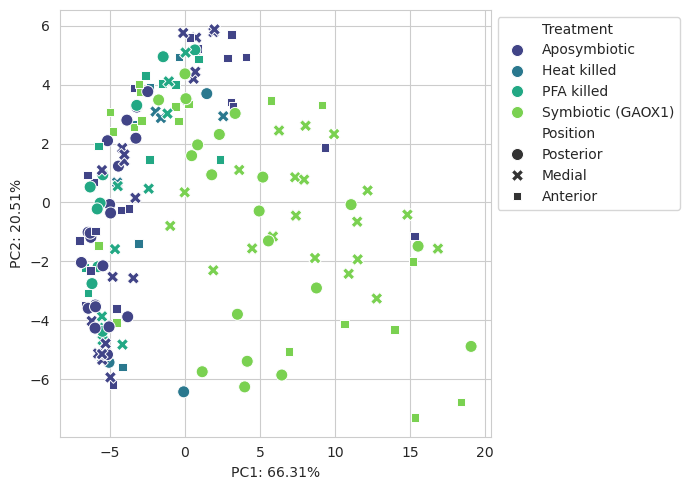

In [21]:
#plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

hue_order = ['Aposymbiotic', 'Heat killed', 'PFA killed', 'Symbiotic (GAOX1)']
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Treatment', style='Position', 
                ax=ax, s=75, palette='viridis', hue_order=hue_order)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel('PC1: 66.31%')
ax.set_ylabel('PC2: 20.51%')

plt.tight_layout()
plt.savefig('../figures/pca.pdf')